#### Импорт библиотек

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Создание DataFrame на основе датасеты `mall_cusumers_filter.csv`

In [304]:
df = pd.read_csv('../datasets/mall_cusumers_filter.csv')

df.head(10)

,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,92,Male,18,59,41
1,66,Male,18,48,59
2,34,Male,18,33,92
3,163,Male,19,81,5
4,139,Male,19,74,10
5,114,Male,19,64,46
6,69,Male,19,48,59
7,62,Male,19,46,55
8,1,Male,19,15,39
9,135,Male,20,73,5


#### Делаем нормальный датасет для анализа
- Ренейминг всех колонок (Они названы не правильно, и очень запутанно)
- Групировка по возрасту
- Нахождения средних расходов по возрасту
- Нахождения максимальных/минимальных расходов по возрасту
- Нахождения максимальных/минимальных доходов по возрасту


In [305]:
df = df.rename(columns={"CustomerID": "id",
                        "Genre": "gender",
                        "Age": "age",
                        "Annual_Income": "income",
                        "Spending_Score": "expenses"})

df = df.groupby(by='age').agg(mean_expenses=('expenses','mean'),
                              mean_income=('income', 'mean'),
                              max_expenses=('expenses', 'max'),
                              max_income=('income', 'max'),
                              min_expenses=('expenses', 'min'),
                              min_income=('income', 'min'),)

df['mean_expenses'], df['mean_income'] = round(df['mean_expenses']), round(df['mean_income'])

df.head(3)

,mean_expenses,mean_income,max_expenses,max_income,min_expenses,min_income
age,,,,,,
18,64.0,47.0,92,59,41,33
19,36.0,55.0,59,81,5,15
20,40.0,52.0,66,73,5,21


#### Строим диаграмму распределение трат 

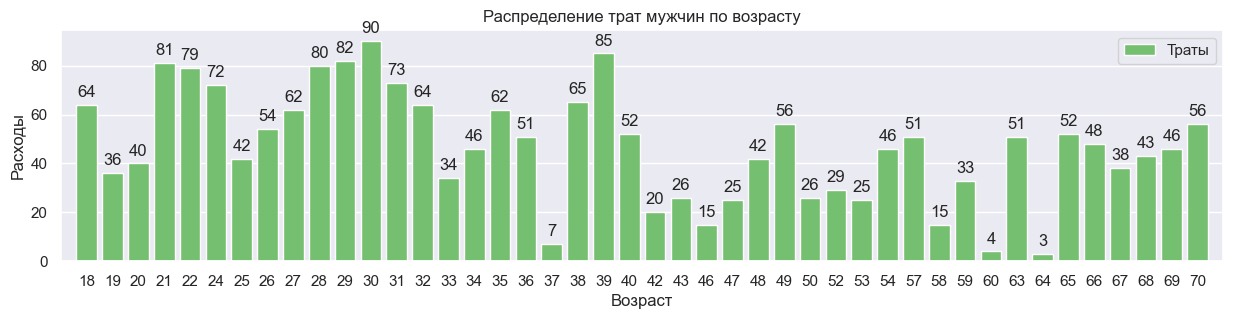

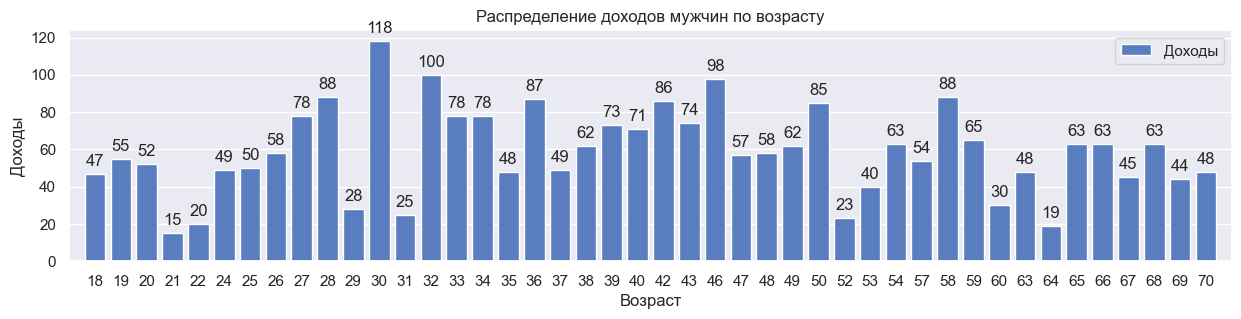

In [306]:
figure, ax = plt.subplots(figsize=(15, 3))
sns.set_color_codes('muted')

bar_plot = sns.barplot(x=df.index.values, y='mean_expenses', data=df, label='Траты', color='g')

ax.legend(loc='upper right', frameon=True)
ax.set(xlim=(-1, 44), xlabel='Возраст', ylabel='Расходы')

for col in bar_plot.patches:
    ax.annotate(format(col.get_height(), '.0f'),
                (col.get_x() + col.get_width() / 2., col.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Распределение трат мужчин по возрасту')

plt.show()


figure, ax = plt.subplots(figsize=(15, 3))
sns.set_color_codes('muted')

bar_plot = sns.barplot(x=df.index.values, y='mean_income', data=df, label='Доходы', color='b')

for col in bar_plot.patches:
    ax.annotate(format(col.get_height(), '.0f'),
                (col.get_x() + col.get_width() / 2., col.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

ax.legend(loc='upper right', frameon=True)
ax.set(xlim=(-1, 44), xlabel='Возраст', ylabel='Доходы')

plt.title('Распределение доходов мужчин по возрасту')

plt.show()